In [638]:
import pandas as pd
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [639]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [640]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [641]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [642]:
#Index df by houses with prices in the data set
df = df[df['Price'].notna()]

In [643]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

In [644]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  object 
 1   Address        27247 non-null  object 
 2   Rooms          27247 non-null  int64  
 3   Type           27247 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         27247 non-null  object 
 6   SellerG        27247 non-null  object 
 7   Date           27247 non-null  object 
 8   Distance       27246 non-null  float64
 9   Postcode       27246 non-null  float64
 10  Bedroom2       20806 non-null  float64
 11  Bathroom       20800 non-null  float64
 12  Car            20423 non-null  float64
 13  Landsize       17982 non-null  float64
 14  BuildingArea   10656 non-null  float64
 15  YearBuilt      12084 non-null  float64
 16  CouncilArea    27244 non-null  object 
 17  Lattitude      20993 non-null  float64
 18  Longti

In [645]:
#Explore the distribution of Rooms variable
df['Rooms'].value_counts()

3     11957
2      6787
4      5918
5      1209
1      1196
6       137
7        20
8        14
10        5
12        2
9         1
16        1
Name: Rooms, dtype: int64

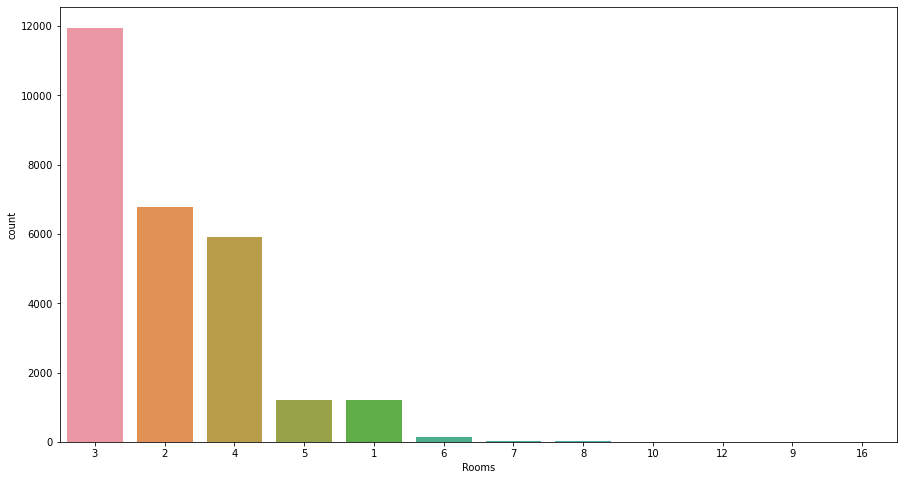

In [646]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.countplot(x='Rooms',data=df,order=df['Rooms'].value_counts().index)
plt.show()

In [647]:
'There are {} unique values for Suburb in this data'.format(len(df['Suburb'].unique()))

'There are 345 unique values for Suburb in this data'

This poses a problem. A model will only be able to accept dummy variables as an input for suburb, indicating a 1 if it belongs to that suburb and a 0 otherwise. This means we are going to have to add 345 columns to our dataset. What else can we do?

In [648]:
#Explore Address variable
'There are {} unique values for Suburb in this data'.format(len(df['Address'].unique()))

'There are 26751 unique values for Suburb in this data'

This makes sense as no two houses can share the same address. We'll dump this column, and assume that the suburb is enough of an idea of where the house is, and we don't need the specific address.

In [649]:
df = df.drop('Address',axis=1)

In [650]:
df['Type'].value_counts()

h    18472
u     5909
t     2866
Name: Type, dtype: int64

This variable indicates whether the property is a house(h), duplex(u), or townhouse(t). Since there are only 3 unique values, we are able to one hot encode this to use in our model.

In [651]:
##One Hot encode the Type column
one_hot = pd.get_dummies(df[['Type']])
df = df.drop('Type',axis=1)
df = df.join(one_hot)

In [652]:
df.head()

,Suburb,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Type_h,Type_t,Type_u
1,Abbotsford,2,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,...,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,1,0,0
2,Abbotsford,2,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,...,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,1,0,0
4,Abbotsford,3,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,...,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,1,0,0
5,Abbotsford,3,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,...,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,1,0,0
6,Abbotsford,4,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,...,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,1,0,0


In [653]:
df['Method'].value_counts()

S     17515
SP     3603
PI     3255
VB     2684
SA      190
Name: Method, dtype: int64

With only 5 unique values for Method, which indicates the status of the property, we can also one hot encode this.

In [654]:
##One Hot encode the Method column
one_hot = pd.get_dummies(df[['Method']])
df = df.drop('Method',axis=1)
df = df.join(one_hot)

In [655]:
df.head()

,Suburb,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,...,Regionname,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
1,Abbotsford,2,1480000.0,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,...,Northern Metropolitan,4019.0,1,0,0,0,1,0,0,0
2,Abbotsford,2,1035000.0,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,...,Northern Metropolitan,4019.0,1,0,0,0,1,0,0,0
4,Abbotsford,3,1465000.0,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,...,Northern Metropolitan,4019.0,1,0,0,0,0,0,1,0
5,Abbotsford,3,850000.0,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,...,Northern Metropolitan,4019.0,1,0,0,1,0,0,0,0
6,Abbotsford,4,1600000.0,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,...,Northern Metropolitan,4019.0,1,0,0,0,0,0,0,1


In [656]:
'There are {} unique values for SellerG in this data'.format(len(df['SellerG'].unique()))

'There are 349 unique values for SellerG in this data'

This variable has a similar issue to it as the Suburb collumn, if we used one-hot encoding here, it would add 350 columns to our df. As this variable just indicates which real estate agent is selling the property, we are going to assume we can ignore it as it doesn't seem very relevant.

In [657]:
df = df.drop('SellerG',axis=1)

In [658]:
df.head()

,Suburb,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,...,Regionname,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
1,Abbotsford,2,1480000.0,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,...,Northern Metropolitan,4019.0,1,0,0,0,1,0,0,0
2,Abbotsford,2,1035000.0,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,...,Northern Metropolitan,4019.0,1,0,0,0,1,0,0,0
4,Abbotsford,3,1465000.0,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,...,Northern Metropolitan,4019.0,1,0,0,0,0,0,1,0
5,Abbotsford,3,850000.0,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,...,Northern Metropolitan,4019.0,1,0,0,1,0,0,0,0
6,Abbotsford,4,1600000.0,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,...,Northern Metropolitan,4019.0,1,0,0,0,0,0,0,1


In [659]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  object 
 1   Rooms          27247 non-null  int64  
 2   Price          27247 non-null  float64
 3   Date           27247 non-null  object 
 4   Distance       27246 non-null  float64
 5   Postcode       27246 non-null  float64
 6   Bedroom2       20806 non-null  float64
 7   Bathroom       20800 non-null  float64
 8   Car            20423 non-null  float64
 9   Landsize       17982 non-null  float64
 10  BuildingArea   10656 non-null  float64
 11  YearBuilt      12084 non-null  float64
 12  CouncilArea    27244 non-null  object 
 13  Lattitude      20993 non-null  float64
 14  Longtitude     20993 non-null  float64
 15  Regionname     27244 non-null  object 
 16  Propertycount  27244 non-null  float64
 17  Type_h         27247 non-null  uint8  
 18  Type_t

In [660]:
len(df['Date'].unique())

78

The date variable simply indicates the date that the house was sold, which is definitely not relevant.

In [661]:
df = df.drop('Date',axis=1)

In [662]:
len(df['CouncilArea'].unique())

34

In [663]:
df['CouncilArea'].value_counts()

Boroondara City Council           2520
Darebin City Council              2349
Moreland City Council             1790
Glen Eira City Council            1643
Moonee Valley City Council        1584
Melbourne City Council            1502
Banyule City Council              1457
Brimbank City Council             1366
Bayside City Council              1311
Maribyrnong City Council          1221
Hume City Council                 1036
Monash City Council               1007
Port Phillip City Council          952
Yarra City Council                 918
Stonnington City Council           884
Manningham City Council            842
Hobsons Bay City Council           799
Kingston City Council              735
Whittlesea City Council            709
Wyndham City Council               492
Whitehorse City Council            435
Maroondah City Council             356
Knox City Council                  287
Melton City Council                243
Frankston City Council             229
Greater Dandenong City Co

We are going to keep this variable and one-hot it. Although it will add a good amount of columns, I'm thinking we can use this as a good indicator for the geographical location of the house, instead of Suburb. We will get rid of any councils that have less than 50 houses in an attempt to keep the data set fairly small.

In [664]:
Councils = ['Macedon Ranges Shire Council','Cardinia Shire Council','Mitchell Shire Council','Moorabool Shire Council']
df = df[~df['CouncilArea'].isin(Councils)]

df = df.drop('Suburb',axis=1)

In [665]:
df['CouncilArea'].value_counts()

Boroondara City Council           2520
Darebin City Council              2349
Moreland City Council             1790
Glen Eira City Council            1643
Moonee Valley City Council        1584
Melbourne City Council            1502
Banyule City Council              1457
Brimbank City Council             1366
Bayside City Council              1311
Maribyrnong City Council          1221
Hume City Council                 1036
Monash City Council               1007
Port Phillip City Council          952
Yarra City Council                 918
Stonnington City Council           884
Manningham City Council            842
Hobsons Bay City Council           799
Kingston City Council              735
Whittlesea City Council            709
Wyndham City Council               492
Whitehorse City Council            435
Maroondah City Council             356
Knox City Council                  287
Melton City Council                243
Frankston City Council             229
Greater Dandenong City Co

In [666]:
##One Hot encode the CouncilArea column
one_hot = pd.get_dummies(df[['CouncilArea']])
df = df.drop('CouncilArea',axis=1)
df = df.join(one_hot)

In [667]:
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Moonee Valley City Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,...,0,0,0,0,0,0,0,0,1,0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,...,0,0,0,0,0,0,0,0,1,0
5,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,...,0,0,0,0,0,0,0,0,1,0


In [668]:
df['Regionname'].value_counts()

Southern Metropolitan         8524
Northern Metropolitan         7864
Western Metropolitan          5815
Eastern Metropolitan          3272
South-Eastern Metropolitan    1341
Eastern Victoria               140
Northern Victoria              116
Western Victoria                91
Name: Regionname, dtype: int64

In [669]:
##One Hot encode the Regionname column
one_hot = pd.get_dummies(df[['Regionname']])
df = df.drop('Regionname',axis=1)
df = df.join(one_hot)

In [670]:
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,...,1,0,0,0,1,0,0,0,0,0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,...,1,0,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,...,1,0,0,0,1,0,0,0,0,0
5,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,...,1,0,0,0,1,0,0,0,0,0
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,...,1,0,0,0,1,0,0,0,0,0


In [671]:
df['BuildingArea'].isnull().sum()

16549

In [672]:
df['YearBuilt'].isnull().sum()

15119

Unfortunately the Building size and Year Built columns are over half null, so we are going to remove these columns initially from the data.

In [673]:
#df = df.drop('BuildingArea',axis=1)


In [674]:
#df = df.drop('YearBuilt',axis=1)

In [675]:
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,...,1,0,0,0,1,0,0,0,0,0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,...,1,0,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,...,1,0,0,0,1,0,0,0,0,0
5,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,...,1,0,0,0,1,0,0,0,0,0
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,...,1,0,0,0,1,0,0,0,0,0


In [676]:
#We will try two approaches, one that drops the missing values and one that uses imputation to fill them in.


from sklearn.impute import SimpleImputer
columns = df.columns
my_imputer = SimpleImputer(strategy='mean')
df_imp = pd.DataFrame(my_imputer.fit_transform(df),columns=columns)


In [677]:
df_imp.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2.0,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,152.531709,1966.544036,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3.0,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,152.531709,1966.544036,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.0,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [678]:
df = df.dropna()
Y = df['Price']
X = df.drop('Price',axis=1)
Y_imp = df_imp['Price']
X_imp = df_imp.drop('Price',axis=1)

print('The size of the imputed dataframe and the dataframe where missing values were dropped is {} and {} respectively.'.format(len(df_imp),len(df)))

The size of the imputed dataframe and the dataframe where missing values were dropped is 27166 and 8859 respectively.


In [679]:
# Let's try a Random Forest model using Gridsearch to select the best parameters
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
estimator = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)
param_grid = { 'max_depth':range(3,7),'n_estimators':[100,200,300,400,500],
                'bootstrap':[True,False]}

forest_grid = GridSearchCV(estimator, param_grid, cv=5, scoring = 'neg_mean_squared_error',verbose=0,n_jobs=-1)
forest_grid.fit(X_train, y_train)
y_pred = forest_grid.predict(X_test)

from sklearn import metrics
print('Results for missing data dropped Dataframe:')
print('Mean Absolute Error of the prediction:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean House Price in Dataset:', np.mean(df['Price']))
print('The Random Forest Regressor is predicting the house price at {}%'.format(100*(1 - (metrics.mean_absolute_error(y_test, y_pred))/np.mean(df['Price']))))
print('Root Mean Squared Error of the prediction:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
Forest_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(RandomForestRegressor.score)

Results for missing data dropped Dataframe:
Mean Absolute Error of the prediction: 209911.41336112478
Mean House Price in Dataset: 1094425.6999661361
The Random Forest Regressor is predicting the house price at 80.819948456289%
Root Mean Squared Error of the prediction: 326679.02602333564
<function RegressorMixin.score at 0x7fca38f8bee0>


In [680]:
X_train, X_test, y_train, y_test = train_test_split(X_imp, Y_imp, test_size = 0.2, random_state = 465)


forest_grid = GridSearchCV(estimator, param_grid, cv=5, scoring = 'neg_mean_squared_error',verbose=0,n_jobs=-1)
forest_grid.fit(X_train, y_train)
y_pred = forest_grid.predict(X_test)

from sklearn import metrics
print('Results for Imputed Dataframe:')
print('Mean Absolute Error of the prediction:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean House Price in Dataset:', np.mean(df_imp['Price']))
print('The Random Forest Regressor is predicting the house price at {}%'.format(100*(1 - (metrics.mean_absolute_error(y_test, y_pred))/np.mean(df_imp['Price']))))
print('Root Mean Squared Error of the prediction:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
Forest_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(RandomForestRegressor.score)

Results for Imputed Dataframe:
Mean Absolute Error of the prediction: 224649.72151096095
Mean House Price in Dataset: 1051377.333063388
The Random Forest Regressor is predicting the house price at 78.63281673988527%
Root Mean Squared Error of the prediction: 383954.9122008924
<function RegressorMixin.score at 0x7fca38f8bee0>


The accuracy for the imputed dataframe is actually lower than the df where we decided to just drop nulls, by about 2%.